# Converting Long/Lat coordinates to point features

In [1]:
# Load relevant R packages
inLibraries = list('repr','jsonlite','sp')
for (rpack in inLibraries) {
  if (is.element(rpack,installed.packages()[,1])){           
      #Load the library into R
      suppressMessages(library(rpack,character.only = TRUE))
    }
    else {
        print(paste("Warning:  ",rpack," is not an installed package"))
    }
}
#resize plot area
options(repr.plot.width=6, repr.plot.height=6)

Warning message:
"package 'sp' was built under R version 3.4.2"

## Example 1 (JSON)

In [2]:
#get file path
filelocation <- file.path('datasets/VAFacilityLocation.json')

#read json file
facilities <- fromJSON(filelocation)

#view file structure
names(facilities)

[1] "CreatedDate"     "Documentation"   "NumberOfEntries" "URLSource"      
[5] "VAFacilityData"

In [3]:
facilities$CreatedDate

[1] "2017-04-11"

In [4]:
facilities$Documentation

[1] "https://www.va.gov/webservices/fandl/documentation/fandl.cfm"

In [5]:
facilities$NumberOfEntries

[1] 1905

In [6]:
facilities$URLSource

[1] "https://www.va.gov/webservices/fandl/facilities.cfc?method=Facility_byRegionIDandType_detail_query&fac_fld=reg_id&fac_val=19&license=xxxx&ReturnFormat=json"

In [7]:
t(head(facilities$VAFacilityData, 3))

,1,2,3
address,150 South Huntington Avenue,950 Campbell Avenue,200 Springs Rd.
city,Jamaica Plain,West Haven,Bedford
division,Veterans Health Administration,Veterans Health Administration,Veterans Health Administration
facility_id,523,689,518
fax,NA,NA,781-687-2101
latitude,42.326988,41.283665,42.502902
longitude,-71.110632,-72.960451,-71.272671
name,VA Boston Healthcare System,VA Connecticut Healthcare System,Edith Nourse Rogers Memorial Veterans Hospital (Bedford VA)
phone,617-232-9500,203-932-5711,781-687-2000
postal_code,02130,06516,01730


In [8]:
#get file structure
names(facilities)

[1] "CreatedDate"     "Documentation"   "NumberOfEntries" "URLSource"      
[5] "VAFacilityData"

In [9]:
names(facilities$VAFacilityData)

[1] "address"     "city"        "division"    "facility_id" "fax"        
 [6] "latitude"    "longitude"   "name"        "phone"       "postal_code"
[11] "region"      "state"       "type"        "url"

In [10]:
#number of records
numrecs <- length(facilities$VAFacilityData[, 1])

numrecs

[1] 1905

In [11]:
#extract the lat, long, and city info for each non-null record
cntit <- 1.0
lats <- c()
longs <- c()
cities <- c()

while(cntit <= numrecs) {
    
    lat <- facilities$VAFacilityData[cntit,"latitude"]
    long <- facilities$VAFacilityData[cntit,"longitude"]
    city <- facilities$VAFacilityData[cntit,"city"]
    
    if (!is.null(lat) 
            & !is.na(lat) 
            & !is.null(long) 
            & !is.na(long)){
        
        lats <- c(lats,lat)
        longs <- c(longs,long)
        cities <- c(cities,city)
    }

    cntit <- cntit + 1  
}

In [12]:
lats[1:5]

[1] "42.326988" "41.283665" "42.502902" "43.0123"   "41.833799"

In [13]:
longs[1:5]

[1] "-71.110632" "-72.960451" "-71.272671" "-71.4408"   "-71.434755"

In [14]:
cities[1:5]

[1] "Jamaica Plain" "West Haven"    "Bedford"       "Manchester"   
[5] "Providence"

### Convert Lat/Long to Spatial Data Frame

Transform the xy coordinates into a spatial point dataframe. This can be done using the SpatialPointsDataFrame() function (sp library). This function requires the coordinates of points, any data that may be related to the points (if any), the proj4string CRS info, as well as a defined bounding box. Here, the projection info and bbox are not specified, but could easily have been. I'm guessing this data is likely in the WGS84 CRS. So, if you'd like to, think back to an earlier module and try to populate the proj4string argument in the SpatialPointsDataFrame() function. You could also experiment with the bounding box argument in order to focus more clearly on a particular region of the world.

After this conversion is complete, the point data can be plotted as has been done before.

In [15]:
# generate coordinate pairs for points
ptcoords <- cbind(as.numeric(longs), as.numeric(lats))

head(ptcoords)

-71.11063,42.32699
-72.96045,41.28366
-71.27267,42.50290
-71.44080,43.01230
-71.43475,41.83380
-71.05471,42.06511


In [16]:
#convert ancillary data to dataframe
city.df <- as.data.frame(cities)

head(city.df)

cities
Jamaica Plain
West Haven
Bedford
Manchester
Providence
Brockton


In [17]:
#create spatialpoints
spts <- SpatialPointsDataFrame(ptcoords, data = city.df)

head(spts)

            coordinates        cities
1 (-71.11063, 42.32699) Jamaica Plain
2 (-72.96045, 41.28366)    West Haven
3  (-71.27267, 42.5029)       Bedford
4   (-71.4408, 43.0123)    Manchester
5  (-71.43476, 41.8338)    Providence
6 (-71.05471, 42.06511)      Brockton

In [18]:
typeof(spts)

[1] "S4"

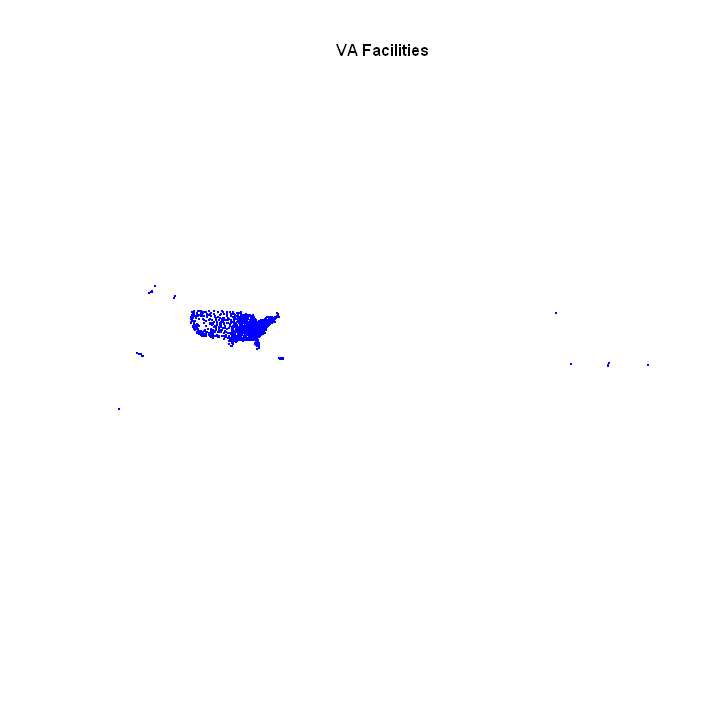

In [19]:
#plot the points
plot(spts, col = 'blue', pch = 20, cex = 0.2, lwd = 0.2, main = "VA Facilities", cex.main = 0.8)

## Example 2 (CSV)

In [20]:
filelocation <- file.path('datasets/Reportable_Rail_Equipment_Accidents.csv')

raildata <- read.csv(filelocation, header = TRUE, sep = ",")

In [21]:
t(head(raildata, 3))

,1,2,3
AccidentType,Derailments,Other events,Derailments
inckey,2013:10:ARR:20130095,2015:07:ARR:2015126,2016:05:ARR:2016106
Fatalities,0,0,0
Injuries,0,0,0
TrackDamage,15000,687,0
EquipmentDamage,2000,187943,12610
HazmatCars,0,0,0
HazmatCarsDerailed,0,0,0
HazmatCarsReleasing,0,0,0
County,MATANUSKA SUSITNA,ANCHORAGE,ANCHORAGE


In [22]:
#get rail accident lat/long data
lats <- raildata$latitude
longs <- raildata$longitude

#get other attributes
cause <- raildata$AccidentCause
railline <- raildata$RailroadCodes

#create dataframe
adddf <- data.frame(cause,railline)

In [23]:
head(adddf)

cause,railline
"M101,","ARR,"
"H017,","ARR,"
"H303,","ARR,"
"T319,","ARR,"
"H309,","ARR,"
"M599,","ARR,"


In [24]:
# combine x and y coordinates
ptcoords <- cbind(as.numeric(longs),as.numeric(lats))

head(ptcoords)

-150.0273,62.60026
-149.8882,61.22276
-149.8882,61.22276
-149.8481,61.22724
-149.5239,61.13564
-149.4454,61.16808


In [25]:
#create spatialpoints
spts <- SpatialPointsDataFrame(ptcoords,data = adddf)

head(spts)

            coordinates cause railline
1 (-150.0273, 62.60026) M101,     ARR,
2 (-149.8882, 61.22276) H017,     ARR,
3 (-149.8882, 61.22276) H303,     ARR,
4 (-149.8481, 61.22724) T319,     ARR,
5 (-149.5239, 61.13564) H309,     ARR,
6 (-149.4454, 61.16808) M599,     ARR,

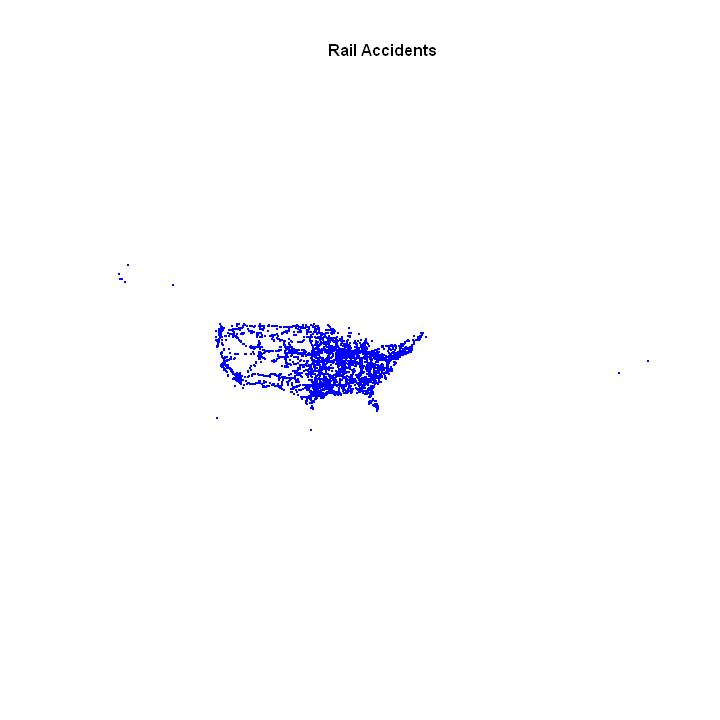

In [26]:
#plot the points
plot(spts, col = 'blue', pch = 20, cex = 0.2, lwd = 0.2,
                 main = "Rail Accidents", cex.main = 0.8)